In [64]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import pydicom 

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/rrmqptest2/config.json
/kaggle/input/rrmqptest2/second/yolov3.weights
/kaggle/input/rrmqptest2/second/backend.h5
/kaggle/input/rrmqptest2/second/README.md
/kaggle/input/rrmqptest2/second/cb_train.pkl
/kaggle/input/rrmqptest2/second/create_validation_set.sh
/kaggle/input/rrmqptest2/second/utils/image.py
/kaggle/input/rrmqptest2/second/utils/multi_gpu_model.py
/kaggle/input/rrmqptest2/second/utils/bbox.py
/kaggle/input/rrmqptest2/second/utils/utils.py
/kaggle/input/rrmqptest2/second/utils/colors.py
/kaggle/input/rrmqptest2/second/utils/__init__.py
/kaggle/input/vinbigdata-chest-xray-abnormalities-detection/sample_submission.csv
/kaggle/input/vinbigdata-chest-xray-abnormalities-detection/train.csv
/kaggle/input/vinbigdata-chest-xray-abnormalities-detection/test/83caa8a85e03606cf57e49147d7ac569.dicom
/kaggle/input/vinbigdata-chest-xray-abnormalities-detection/test/7550347fa2bb96c2354a3716dfa3a69c.dicom
/kaggle/input/vinbigdata-chest-xray-abnormalities-detection/test/74b23792d

In [65]:
import os
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import PIL
from PIL import Image
import matplotlib
from keras.preprocessing.image import img_to_array
from numpy import expand_dims
from keras.preprocessing.image import load_img

In [66]:
image1 = pd.read_csv('/kaggle/input/vinbigdata-chest-xray-abnormalities-detection/train.csv')

In [67]:
image1.describe()

class_id         x_min         y_min         x_max         y_max
count  67914.000000  36096.000000  36096.000000  36096.000000  36096.000000
mean       9.979312   1051.332696   1065.262051   1492.269337   1456.660489
std        5.036494    565.838078    552.925133    595.384126    581.134138
min        0.000000      0.000000      0.000000     68.000000    103.000000
25%        7.000000    602.000000    627.000000   1010.000000   1009.000000
50%       13.000000   1014.500000    935.000000   1567.000000   1411.000000
75%       14.000000   1457.000000   1471.000000   1947.000000   1911.000000
max       14.000000   2934.000000   3133.000000   3131.000000   3384.000000

In [68]:
column = image1['image_id']
print(column)
print (image1)
index = np.arange(0,len(column))
print(index)

0        50a418190bc3fb1ef1633bf9678929b3
1        21a10246a5ec7af151081d0cd6d65dc9
2        9a5094b2563a1ef3ff50dc5c7ff71345
3        051132a778e61a86eb147c7c6f564dfe
4        063319de25ce7edb9b1c6b8881290140
                       ...               
67909    936fd5cff1c058d39817a08f58b72cae
67910    ca7e72954550eeb610fe22bf0244b7fa
67911    aa17d5312a0fb4a2939436abca7f9579
67912    4b56bc6d22b192f075f13231419dfcc8
67913    5e272e3adbdaafb07a7e84a9e62b1a4c
Name: image_id, Length: 67914, dtype: object
                               image_id          class_name  class_id rad_id  \
0      50a418190bc3fb1ef1633bf9678929b3          No finding        14    R11   
1      21a10246a5ec7af151081d0cd6d65dc9          No finding        14     R7   
2      9a5094b2563a1ef3ff50dc5c7ff71345        Cardiomegaly         3    R10   
3      051132a778e61a86eb147c7c6f564dfe  Aortic enlargement         0    R10   
4      063319de25ce7edb9b1c6b8881290140          No finding        14    R10   
...          

In [69]:
image1 = image1.drop_duplicates(keep='last',subset = ["image_id"])
print((image1.shape))
im1 = image1['image_id']
im1 = np.array(im1)
#print(im1[0])

(15000, 8)


In [138]:
column1 = image1['class_id']
column1 = np.array(column1)
print (type(column1))
labels = [None] * len(column1)
la = []
#print (labels)
#labels = np.array(range(len(column1)), dtype=str)
index = np.arange(0,len(column1),1)
#print ((index))
for i in index:
    if column1[i] == 14:
        labels[i] = 0
       
    else:
        labels[i] = 1
        #print (labels[i])
        #print (i)
        
print(len(labels))        

<class 'numpy.ndarray'>
15000


In [71]:
#print ((labels))

In [72]:
from keras.preprocessing.image import load_img
import cv2
def train_generator ():
#index = np.array(column[1:len(column),0])

    i =10
    index = np.arange(0,i)
    x=np.array([])
    data=[]
    for im in index:
        dicom = pydicom.read_file('/kaggle/input/vinbigdata-chest-xray-abnormalities-detection/train' + "/"+ im1[im] + ".dicom" )
        image = np.array(dicom.pixel_array)
        image = cv2.resize(image,(416,416))
        data.append(image)
    #print (type(image))

    data = np.array(data)
    data = np.resize(data,(i,416,416,3))/255
    train_labels = labels[0:i]
    train_labels = np.array(train_labels)

    yield data , train_labels

In [73]:
from keras.preprocessing.image import load_img
import cv2 
def val_generator():
    index = np.arange(1000,1500)
    x=np.array([])
    data2=[]
    for im in index:
        dicom3 = pydicom.read_file('/kaggle/input/vinbigdata-chest-xray-abnormalities-detection/train' + "/"+ im1[im] + ".dicom" )
        image3 = np.array(dicom3.pixel_array)
        image3 = cv2.resize(image3,(416,416))
        data2.append(image3)
    #print (type(image))
    data2 = np.resize(data2,(500,416,416,3))/255
    val_labels = labels[1000:1500]
    val_labels = np.array(val_labels)
    data2 = np.array(data2)   
    yield data2 , val_labels
       

In [74]:
from keras.preprocessing.image import load_img
import cv2
def val_generator1 ():
    while True:
#index = np.array(column[1:len(column),0])
        batch = np.arange(550,1050,50)
        for j in batch:   
            y = np.arange(j-50,j)
            train_lab = []
            data=[]

            for im in y:

                dicom = pydicom.read_file('/kaggle/input/vinbigdata-chest-xray-abnormalities-detection/train' + "/"+ im1[im] + ".dicom" )
                image = np.array(dicom.pixel_array)
                image = cv2.resize(image,(416,416))
                data.append(image)

                train_labels = labels[im]
                train_lab.append(train_labels)
            data = np.resize(data,(50,416,416,3))/255
            data = np.asarray(data)        
            train_lab = np.asarray(train_lab)
            yield data , train_lab
            #print (type(image))

   #     data = np.array(data)
    #    data = np.resize(data,(i,416,416,3))/255
        
     #   train_labels = np.array(train_labels)

       

In [75]:
from keras.preprocessing.image import load_img
import cv2
def train_generator1 ():
    while True:
#index = np.array(column[1:len(column),0])
        batch = np.arange(1050,2050,50)
        for j in batch:   
            y = np.arange(j-50,j)
            train_lab = []
            data=[]

            for im in y:

                dicom = pydicom.read_file('/kaggle/input/vinbigdata-chest-xray-abnormalities-detection/train' + "/"+ im1[im] + ".dicom" )
                image = np.array(dicom.pixel_array)
                image = cv2.resize(image,(416,416))
                data.append(image)
                train_labels = labels[im]
                train_lab.append(train_labels)
                

            data = np.resize(data,(50,416,416,3))/255
            data = np.asarray(data)        
            train_lab = np.asarray(train_lab)
           # print (train_lab)    
            yield data , train_lab
            #print (type(image))

   #     data = np.array(data)
    #    data = np.resize(data,(i,416,416,3))/255
        
     #   train_labels = np.array(train_labels)

       

In [76]:
#print((train_lab))
#print (data)

In [77]:
#print (labels[0:110])
#print (labels)

In [78]:
from keras.preprocessing.image import load_img
import cv2
def test_generator ():
#index = np.array(column[1:len(column),0])
    batch = np.arange(350,550,50)
    for j in batch:   
        y = np.arange(j-50,j)
        train_lab = []
        data=[]
        
        for im in y:
            
            dicom = pydicom.read_file('/kaggle/input/vinbigdata-chest-xray-abnormalities-detection/train' + "/"+ im1[im] + ".dicom" )
            image = np.array(dicom.pixel_array)
            image = cv2.resize(image,(416,416))
            data.append(image)
            #print (im)
            train_labels = labels[im]
            train_lab.append(train_labels)
        data = np.resize(data,(50,416,416,3))/255
        data = np.asarray(data)        
        train_lab = np.asarray(train_lab)
        yield data , train_lab
        #print (type(image))

   #     data = np.array(data)
    #    data = np.resize(data,(i,416,416,3))/255
        
     #   train_labels = np.array(train_labels)

       

In [79]:
test_labels = labels[300:500]
print (test_labels)

[0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0]


In [80]:
x=[]
y=[]
#x,y = train_generator1()
#print (x.shape)

In [81]:
#print ((y))

In [82]:
batch = np.arange(10,1000,10)
print (batch)

[ 10  20  30  40  50  60  70  80  90 100 110 120 130 140 150 160 170 180
 190 200 210 220 230 240 250 260 270 280 290 300 310 320 330 340 350 360
 370 380 390 400 410 420 430 440 450 460 470 480 490 500 510 520 530 540
 550 560 570 580 590 600 610 620 630 640 650 660 670 680 690 700 710 720
 730 740 750 760 770 780 790 800 810 820 830 840 850 860 870 880 890 900
 910 920 930 940 950 960 970 980 990]


In [83]:
batch = np.arange(1050,2050,50)
print (batch)

[1050 1100 1150 1200 1250 1300 1350 1400 1450 1500 1550 1600 1650 1700
 1750 1800 1850 1900 1950 2000]


In [84]:
index1 = np.arange(0,3)
x=np.array([])
data1=[]
for i in index1:
    dicom1 = pydicom.read_file('/kaggle/input/vinbigdata-chest-xray-abnormalities-detection/train' + "/"+ im1[i] + ".dicom" )
    image2 = np.array(dicom1.pixel_array)
    image2 = cv2.resize(image2,(416,416))
    data1.append(image2)
    #print (type(image))

data1 = np.array(data1)

/opt/conda/lib/python3.7/site-packages/pydicom/pixel_data_handlers/pillow_handler.py:177: UserWarning: The (0028,0101) 'Bits Stored' value (14-bit) doesn't match the JPEG 2000 data (16-bit). It's recommended that you change the 'Bits Stored' value
  f"The (0028,0101) 'Bits Stored' value ({ds.BitsStored}-bit) "


In [85]:
#from numpy import expand_dims
#print(data.shape)
#data = expand_dims(data, -1)
#print(data.shape)
#data = np.array(data)

In [86]:
#print(dicom)
#print (data.shape)
#plt.imshow(data[2], cmap='gray')
#print(x[0])

#print (image1)
#print(data[1].shape)
#print(data.shape)
#print(type(data))

In [87]:
#df = pd.DataFrame(labels,columns = ['new'])

#df1 = pd.DataFrame(column1)
#df1.columns= ['old']

#print (df.shape)
#print (df1.shape)
#df.reset_index(drop=True, inplace=True)
#df1.reset_index(drop=True, inplace=True)
#print(df)
#print(df1)
#y = column1.to_frame()
#final  = pd.concat([df,df1],axis=1)
#print(final)
#comparison_column = np.where(final["new"] == final["old"], True, False)
#final["equal"] = comparison_column

#print(final)

In [88]:
#column1 = image1['class_id']
#labels = [None] * len(column1)
#index = np.arange(1,len(column1),1)
#print ((index))
#for i in index:
 #   if column1[i] == 14:
  #      labels[i] = column1[i]
  #  else:
   #     labels[i] == "Disease"

In [89]:

# create a YOLOv3 Keras model and save it to file
# based on https://github.com/experiencor/keras-yolo3
import struct
import numpy as np
from keras.layers import Conv2D
from keras.layers import Input
from keras.layers import BatchNormalization
from keras.layers import LeakyReLU
from keras.layers import ZeroPadding2D
from keras.layers import UpSampling2D
from keras.layers.merge import add, concatenate
from keras.models import Model

def _conv_block(inp, convs, skip=True):
	x = inp
	count = 0
	for conv in convs:
		if count == (len(convs) - 2) and skip:
			skip_connection = x
		count += 1
		if conv['stride'] > 1: x = ZeroPadding2D(((1,0),(1,0)))(x) # peculiar padding as darknet prefer left and top
		x = Conv2D(conv['filter'],
				   conv['kernel'],
				   strides=conv['stride'],
				   padding='valid' if conv['stride'] > 1 else 'same', # peculiar padding as darknet prefer left and top
				   name='conv_' + str(conv['layer_idx']),
				   use_bias=False if conv['bnorm'] else True)(x)
		if conv['bnorm']: x = BatchNormalization(epsilon=0.001, name='bnorm_' + str(conv['layer_idx']))(x)
		if conv['leaky']: x = LeakyReLU(alpha=0.1, name='leaky_' + str(conv['layer_idx']))(x)
	return add([skip_connection, x]) if skip else x

def make_yolov3_model():
	input_image = Input(shape=(None, None, 3))
	# Layer  0 => 4
	x = _conv_block(input_image, [{'filter': 32, 'kernel': 3, 'stride': 1, 'bnorm': True, 'leaky': True, 'layer_idx': 0},
								  {'filter': 64, 'kernel': 3, 'stride': 2, 'bnorm': True, 'leaky': True, 'layer_idx': 1},
								  {'filter': 32, 'kernel': 1, 'stride': 1, 'bnorm': True, 'leaky': True, 'layer_idx': 2},
								  {'filter': 64, 'kernel': 3, 'stride': 1, 'bnorm': True, 'leaky': True, 'layer_idx': 3}])
	# Layer  5 => 8
	x = _conv_block(x, [{'filter': 128, 'kernel': 3, 'stride': 2, 'bnorm': True, 'leaky': True, 'layer_idx': 5},
						{'filter':  64, 'kernel': 1, 'stride': 1, 'bnorm': True, 'leaky': True, 'layer_idx': 6},
						{'filter': 128, 'kernel': 3, 'stride': 1, 'bnorm': True, 'leaky': True, 'layer_idx': 7}])
	# Layer  9 => 11
	x = _conv_block(x, [{'filter':  64, 'kernel': 1, 'stride': 1, 'bnorm': True, 'leaky': True, 'layer_idx': 9},
						{'filter': 128, 'kernel': 3, 'stride': 1, 'bnorm': True, 'leaky': True, 'layer_idx': 10}])
	# Layer 12 => 15
	x = _conv_block(x, [{'filter': 256, 'kernel': 3, 'stride': 2, 'bnorm': True, 'leaky': True, 'layer_idx': 12},
						{'filter': 128, 'kernel': 1, 'stride': 1, 'bnorm': True, 'leaky': True, 'layer_idx': 13},
						{'filter': 256, 'kernel': 3, 'stride': 1, 'bnorm': True, 'leaky': True, 'layer_idx': 14}])
	# Layer 16 => 36
	for i in range(7):
		x = _conv_block(x, [{'filter': 128, 'kernel': 1, 'stride': 1, 'bnorm': True, 'leaky': True, 'layer_idx': 16+i*3},
							{'filter': 256, 'kernel': 3, 'stride': 1, 'bnorm': True, 'leaky': True, 'layer_idx': 17+i*3}])
	skip_36 = x
	# Layer 37 => 40
	x = _conv_block(x, [{'filter': 512, 'kernel': 3, 'stride': 2, 'bnorm': True, 'leaky': True, 'layer_idx': 37},
						{'filter': 256, 'kernel': 1, 'stride': 1, 'bnorm': True, 'leaky': True, 'layer_idx': 38},
						{'filter': 512, 'kernel': 3, 'stride': 1, 'bnorm': True, 'leaky': True, 'layer_idx': 39}])
	# Layer 41 => 61
	for i in range(7):
		x = _conv_block(x, [{'filter': 256, 'kernel': 1, 'stride': 1, 'bnorm': True, 'leaky': True, 'layer_idx': 41+i*3},
							{'filter': 512, 'kernel': 3, 'stride': 1, 'bnorm': True, 'leaky': True, 'layer_idx': 42+i*3}])
	skip_61 = x
	# Layer 62 => 65
	x = _conv_block(x, [{'filter': 1024, 'kernel': 3, 'stride': 2, 'bnorm': True, 'leaky': True, 'layer_idx': 62},
						{'filter':  512, 'kernel': 1, 'stride': 1, 'bnorm': True, 'leaky': True, 'layer_idx': 63},
						{'filter': 1024, 'kernel': 3, 'stride': 1, 'bnorm': True, 'leaky': True, 'layer_idx': 64}])
	# Layer 66 => 74
	for i in range(3):
		x = _conv_block(x, [{'filter':  512, 'kernel': 1, 'stride': 1, 'bnorm': True, 'leaky': True, 'layer_idx': 66+i*3},
							{'filter': 1024, 'kernel': 3, 'stride': 1, 'bnorm': True, 'leaky': True, 'layer_idx': 67+i*3}])
	# Layer 75 => 79
	x = _conv_block(x, [{'filter':  512, 'kernel': 1, 'stride': 1, 'bnorm': True, 'leaky': True, 'layer_idx': 75},
						{'filter': 1024, 'kernel': 3, 'stride': 1, 'bnorm': True, 'leaky': True, 'layer_idx': 76},
						{'filter':  512, 'kernel': 1, 'stride': 1, 'bnorm': True, 'leaky': True, 'layer_idx': 77},
						{'filter': 1024, 'kernel': 3, 'stride': 1, 'bnorm': True, 'leaky': True, 'layer_idx': 78},
						{'filter':  512, 'kernel': 1, 'stride': 1, 'bnorm': True, 'leaky': True, 'layer_idx': 79}], skip=False)
	# Layer 80 => 82
	yolo_82 = _conv_block(x, [{'filter': 1024, 'kernel': 3, 'stride': 1, 'bnorm': True,  'leaky': True,  'layer_idx': 80},
							  {'filter':  255, 'kernel': 1, 'stride': 1, 'bnorm': False, 'leaky': False, 'layer_idx': 81}], skip=False)
	# Layer 83 => 86
	x = _conv_block(x, [{'filter': 256, 'kernel': 1, 'stride': 1, 'bnorm': True, 'leaky': True, 'layer_idx': 84}], skip=False)
	x = UpSampling2D(2)(x)
	x = concatenate([x, skip_61])
	# Layer 87 => 91
	x = _conv_block(x, [{'filter': 256, 'kernel': 1, 'stride': 1, 'bnorm': True, 'leaky': True, 'layer_idx': 87},
						{'filter': 512, 'kernel': 3, 'stride': 1, 'bnorm': True, 'leaky': True, 'layer_idx': 88},
						{'filter': 256, 'kernel': 1, 'stride': 1, 'bnorm': True, 'leaky': True, 'layer_idx': 89},
						{'filter': 512, 'kernel': 3, 'stride': 1, 'bnorm': True, 'leaky': True, 'layer_idx': 90},
						{'filter': 256, 'kernel': 1, 'stride': 1, 'bnorm': True, 'leaky': True, 'layer_idx': 91}], skip=False)
	# Layer 92 => 94
	yolo_94 = _conv_block(x, [{'filter': 512, 'kernel': 3, 'stride': 1, 'bnorm': True,  'leaky': True,  'layer_idx': 92},
							  {'filter': 255, 'kernel': 1, 'stride': 1, 'bnorm': False, 'leaky': False, 'layer_idx': 93}], skip=False)
	# Layer 95 => 98
	x = _conv_block(x, [{'filter': 128, 'kernel': 1, 'stride': 1, 'bnorm': True, 'leaky': True,   'layer_idx': 96}], skip=False)
	x = UpSampling2D(2)(x)
	x = concatenate([x, skip_36])
	# Layer 99 => 106
	yolo_106 = _conv_block(x, [{'filter': 128, 'kernel': 1, 'stride': 1, 'bnorm': True,  'leaky': True,  'layer_idx': 99},
							   {'filter': 256, 'kernel': 3, 'stride': 1, 'bnorm': True,  'leaky': True,  'layer_idx': 100},
							   {'filter': 128, 'kernel': 1, 'stride': 1, 'bnorm': True,  'leaky': True,  'layer_idx': 101},
							   {'filter': 256, 'kernel': 3, 'stride': 1, 'bnorm': True,  'leaky': True,  'layer_idx': 102},
							   {'filter': 128, 'kernel': 1, 'stride': 1, 'bnorm': True,  'leaky': True,  'layer_idx': 103},
							   {'filter': 256, 'kernel': 3, 'stride': 1, 'bnorm': True,  'leaky': True,  'layer_idx': 104},
							   {'filter': 255, 'kernel': 1, 'stride': 1, 'bnorm': False, 'leaky': False, 'layer_idx': 105}], skip=False)
	model = Model(input_image, [yolo_82, yolo_94, yolo_106])
	return model

class WeightReader:
	def __init__(self, weight_file):
		with open(weight_file, 'rb') as w_f:
			major,	= struct.unpack('i', w_f.read(4))
			minor,	= struct.unpack('i', w_f.read(4))
			revision, = struct.unpack('i', w_f.read(4))
			if (major*10 + minor) >= 2 and major < 1000 and minor < 1000:
				w_f.read(8)
			else:
				w_f.read(4)
			transpose = (major > 1000) or (minor > 1000)
			binary = w_f.read()
		self.offset = 0
		self.all_weights = np.frombuffer(binary, dtype='float32')

	def read_bytes(self, size):
		self.offset = self.offset + size
		return self.all_weights[self.offset-size:self.offset]

	def load_weights(self, model):
		for i in range(106):
			try:
				conv_layer = model.get_layer('conv_' + str(i))
				print("loading weights of convolution #" + str(i))
				if i not in [81, 93, 105]:
					norm_layer = model.get_layer('bnorm_' + str(i))
					size = np.prod(norm_layer.get_weights()[0].shape)
					beta  = self.read_bytes(size) # bias
					gamma = self.read_bytes(size) # scale
					mean  = self.read_bytes(size) # mean
					var   = self.read_bytes(size) # variance
					weights = norm_layer.set_weights([gamma, beta, mean, var])
				if len(conv_layer.get_weights()) > 1:
					bias   = self.read_bytes(np.prod(conv_layer.get_weights()[1].shape))
					kernel = self.read_bytes(np.prod(conv_layer.get_weights()[0].shape))
					kernel = kernel.reshape(list(reversed(conv_layer.get_weights()[0].shape)))
					kernel = kernel.transpose([2,3,1,0])
					conv_layer.set_weights([kernel, bias])
				else:
					kernel = self.read_bytes(np.prod(conv_layer.get_weights()[0].shape))
					kernel = kernel.reshape(list(reversed(conv_layer.get_weights()[0].shape)))
					kernel = kernel.transpose([2,3,1,0])
					conv_layer.set_weights([kernel])
			except ValueError:
				print("no convolution #" + str(i))

	def reset(self):
		self.offset = 0

# define the model
model = make_yolov3_model()
# load the model weights
weight_reader = WeightReader('/kaggle/input/rrmqptest2/second/yolov3.weights')
# set the model weights into the model
weight_reader.load_weights(model)
# save the model to file
model.save('model.h5')
print (model.summary())

loading weights of convolution #0
loading weights of convolution #1
loading weights of convolution #2
loading weights of convolution #3
no convolution #4
loading weights of convolution #5
loading weights of convolution #6
loading weights of convolution #7
no convolution #8
loading weights of convolution #9
loading weights of convolution #10
no convolution #11
loading weights of convolution #12
loading weights of convolution #13
loading weights of convolution #14
no convolution #15
loading weights of convolution #16
loading weights of convolution #17
no convolution #18
loading weights of convolution #19
loading weights of convolution #20
no convolution #21
loading weights of convolution #22
loading weights of convolution #23
no convolution #24
loading weights of convolution #25
loading weights of convolution #26
no convolution #27
loading weights of convolution #28
loading weights of convolution #29
no convolution #30
loading weights of convolution #31
loading weights of convolution #32

In [90]:
#model.summary()

In [91]:
model.outputs[0]
#model.layers[-1]

<KerasTensor: shape=(None, None, None, 255) dtype=float32 (created by layer 'conv_81')>

In [92]:
from tensorflow.keras.models import Model
from keras.layers import Dense, GlobalMaxPooling2D
#print (model.layers[-1].output)
x = GlobalMaxPooling2D(name = 'global')(model.layers[-1].output)
output= Dense(2,activation = 'softmax')(x)
inputs= model.inputs
model_1 = Model(inputs= inputs, outputs= output)
#print (inputs)

In [93]:
model_1.layers[-5]

In [94]:
model_1.summary()

Model: "model_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, None, None,  0                                            
__________________________________________________________________________________________________
conv_0 (Conv2D)                 (None, None, None, 3 864         input_2[0][0]                    
__________________________________________________________________________________________________
bnorm_0 (BatchNormalization)    (None, None, None, 3 128         conv_0[0][0]                     
__________________________________________________________________________________________________
leaky_0 (LeakyReLU)             (None, None, None, 3 0           bnorm_0[0][0]                    
____________________________________________________________________________________________

In [95]:
for layer in model_1.layers:
    layer.trainable = False
#model_1.summary()

In [96]:
model_1.layers[-2].trainable= True
model_1.layers[-3].trainable= True
model_1.layers[-5].trainable= True
#model_1.summary()

In [97]:
model_1.compile(optimizer = 'sgd', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [98]:
#class_weight = {0: 0.25, 1: 0.75}

In [99]:
history = model_1.fit(train_generator1(), epochs=5,verbose=1,steps_per_epoch=1000/50,batch_size=50,validation_data = val_generator1(),validation_steps=500/50,shuffle=True)

/opt/conda/lib/python3.7/site-packages/pydicom/pixel_data_handlers/pillow_handler.py:177: UserWarning: The (0028,0101) 'Bits Stored' value (12-bit) doesn't match the JPEG 2000 data (16-bit). It's recommended that you change the 'Bits Stored' value
  f"The (0028,0101) 'Bits Stored' value ({ds.BitsStored}-bit) "


Epoch 1/5
20/20 [==============================] - 1356s 71s/step - loss: 0.6803 - accuracy: 0.7797 - val_loss: 0.5300 - val_accuracy: 0.9120
Epoch 2/5
20/20 [==============================] - 1314s 69s/step - loss: 0.4098 - accuracy: 0.8896 - val_loss: 0.3994 - val_accuracy: 0.9080
Epoch 3/5
20/20 [==============================] - 1304s 68s/step - loss: 0.3839 - accuracy: 0.8956 - val_loss: 0.3691 - val_accuracy: 0.9020
Epoch 4/5
20/20 [==============================] - 1317s 69s/step - loss: 0.3723 - accuracy: 0.9004 - val_loss: 0.3616 - val_accuracy: 0.9000
Epoch 5/5
20/20 [==============================] - 1296s 68s/step - loss: 0.3641 - accuracy: 0.8981 - val_loss: 0.3577 - val_accuracy: 0.9000


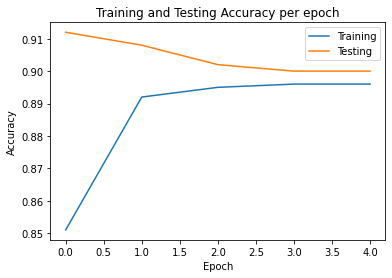

In [100]:
#print(history.history)
plt.figure()
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Training and Testing Accuracy per epoch')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Training', 'Testing'])
plt.show()

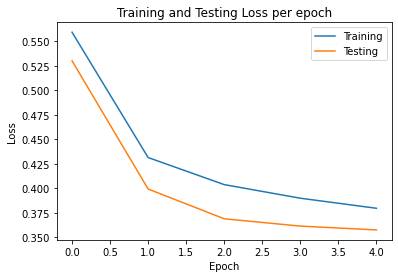

In [101]:
#print(history.history)
plt.figure()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Training and Testing Loss per epoch')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Training','Testing'])
plt.show()

In [102]:
prediction = model_1.predict(test_generator())
#print(la2)


In [103]:
#print (prediction)

In [104]:
#pred = np.round(prediction)
#print (pred)

In [105]:
pred = np.argmax(prediction,axis=1)
print (pred)
print(test_labels)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1
 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0]
[0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1

In [106]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report,roc_auc_score
import seaborn as sns
import matplotlib.pyplot as plt

def printCM(cm,labels):
    ax= plt.subplot()
    sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells
    # labels, title and ticks
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels'); 
    ax.set_title('Confusion Matrix') 
    ax.xaxis.set_ticklabels(labels)
    ax.yaxis.set_ticklabels(labels)
    return

              precision    recall  f1-score   support

           0       0.93      0.98      0.96       187
           1       0.00      0.00      0.00        13

    accuracy                           0.92       200
   macro avg       0.47      0.49      0.48       200
weighted avg       0.87      0.92      0.90       200

The AUC score is 0.4919786096256685
The total accuracy is: 0.92


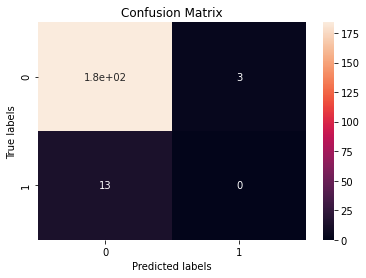

In [107]:
labels1 = ['0', '1']
cm = confusion_matrix(test_labels, pred)
printCM(cm,labels1)
print(classification_report(test_labels, pred))
print('The AUC score is', roc_auc_score(test_labels, pred))
print('The total accuracy is:',accuracy_score(test_labels, pred))

In [108]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score

accur_score = accuracy_score(test_labels, pred)
print ("Accuracy", accur_score)

f1 = f1_score(test_labels, pred)
print ("fi score", f1)

rec_score = recall_score(test_labels, pred)
print ("Recall", rec_score)

pre_score = precision_score(test_labels, pred)
print ("Precision", pre_score)

Accuracy 0.92
fi score 0.0
Recall 0.0
Precision 0.0


In [109]:
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(test_labels, pred)
print ("AUC",auc)

AUC 0.4919786096256685


In [110]:
sensitivity1 = cm[0,0]/(cm[0,0]+cm[0,1])
print('Sensitivity : ', sensitivity1 )

specificity1 = cm[1,1]/(cm[1,0]+cm[1,1])
print('Specificity : ', specificity1)

Sensitivity :  0.983957219251337
Specificity :  0.0


In [120]:
#print (labels)

In [112]:
#matplotlib.image.imsave('xray1.png', input_data[0])

In [113]:
# load yolov3 model
#from keras.models import load_model

#model = load_model('model.h5')

In [114]:
#im = Image.fromarray(data[2])
#im.save("xray.png")

In [115]:
#matplotlib.image.imsave('xray1.png', data[2])

In [116]:
#yhat = model.predict(image)

In [117]:
no_finding =0
dis =0
index = np.arange(0,len(labels),1)
for i in index:
    if labels[i] == 0 :
        no_finding = no_finding+1 # no finding
    else:
        dis=dis+1 # disease

In [140]:
no_finding1 =0
dis1 =0
t_label = labels[1000:2000]
index = np.arange(0,len(t_label),1)

for i in index:
    if t_label[i] == 0 :
        no_finding1 = no_finding1+1 # no finding
    else:
        dis1=dis1+1 # disease

In [142]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
labels2 = ['No Finding', 'Disease']
height = [no_finding1 ,dis1]
ax.bar(labels2,height)
plt.show()

In [118]:
print (no_finding)
print (dis)

10606
4394


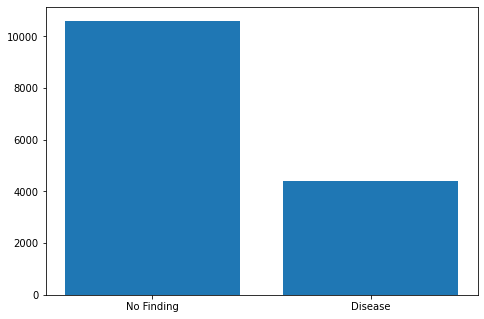

In [137]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
labels2 = ['No Finding', 'Disease']
height = [no_finding ,dis]
ax.bar(labels,height)
plt.show()